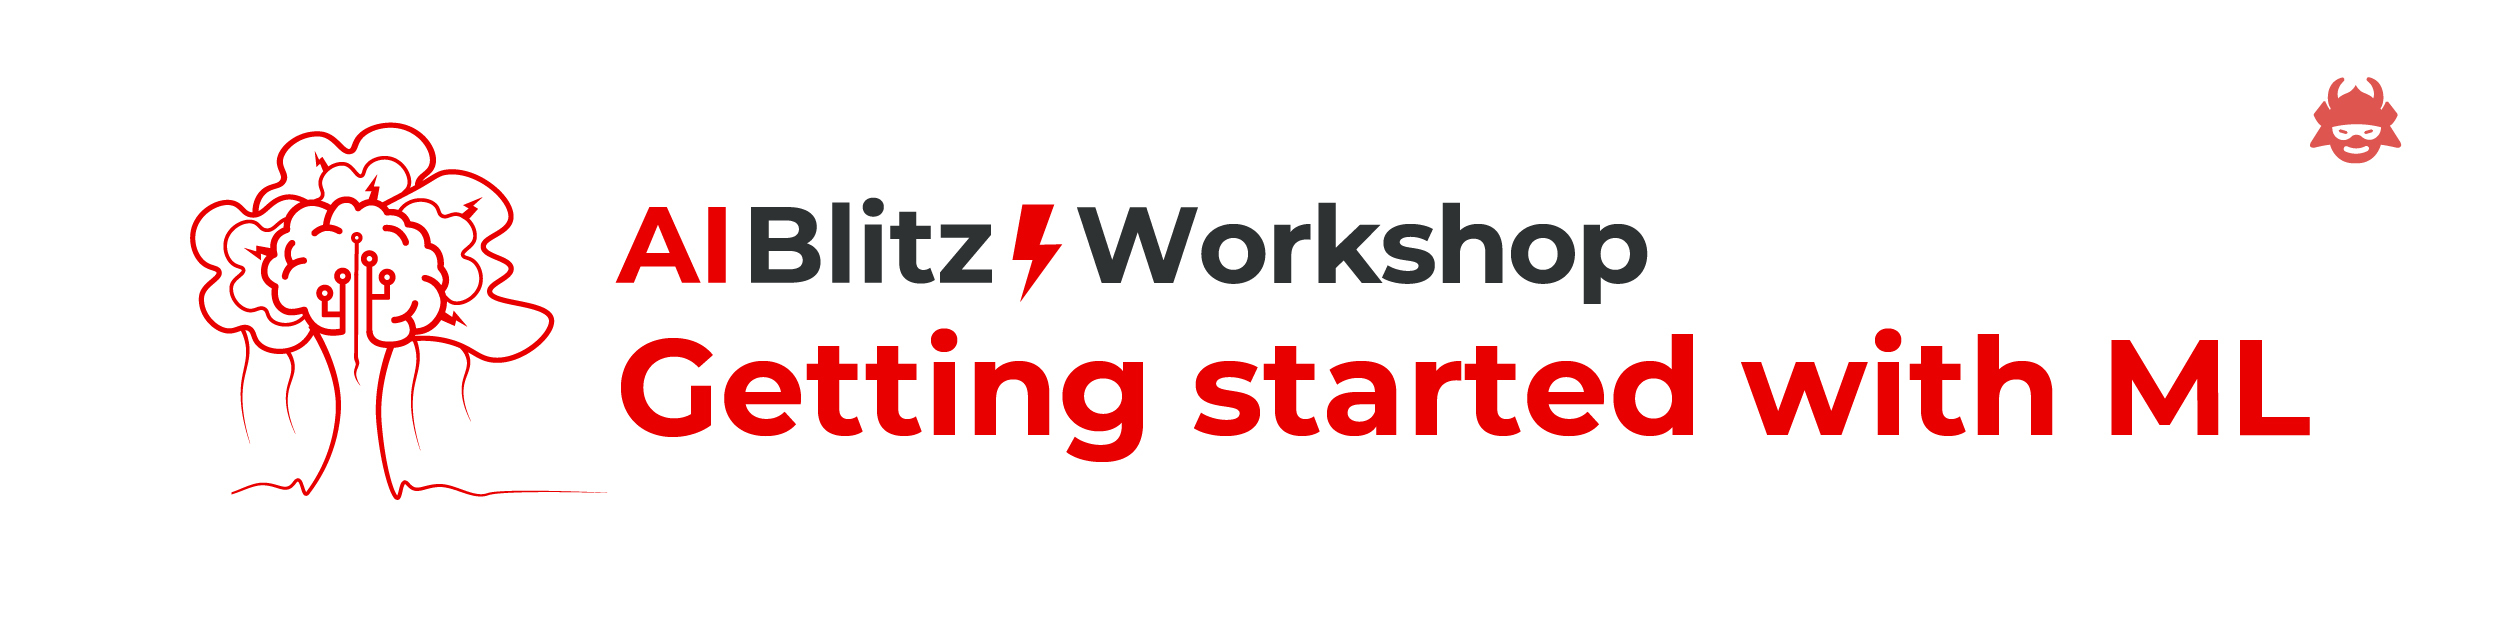

# Download Necessary Packages 📚

**FastAI**

fastai is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches. It aims to do both things without substantial compromises in ease of use, flexibility, or performance. 

**AIcrowd-CLI**

AIcrowd Command Line Interface is basically a package that allows you to download datasets from the AIcrowd website and make submissions directly from colab!



In [ ]:
!pip install --upgrade fastai 
!pip install aicrowd-cli==0.1

     |████████████████████████████████| 194kB 7.4MB/s 
     |████████████████████████████████| 12.8MB 225kB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 163kB 10.9MB/s 
     |████████████████████████████████| 204kB 18.0MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 51kB 5.

!pip = A piece of software written in Python used to install stuff

install = install 👀

## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.

Please enter your API Key from https://www.aicrowd.com/participants/me

In [ ]:
API_KEY = 'YOUR_API_KEY' 
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


Downloading the Data here! 🤓

In [ ]:
!aicrowd dataset download --challenge rover-classification

sample_submission.csv: 100% 164k/164k [00:00<00:00, 1.96MB/s]
test.zip: 100% 66.5M/66.5M [00:07<00:00, 9.43MB/s]
train.csv: 100% 689k/689k [00:00<00:00, 4.85MB/s]
train.zip: 100% 266M/266M [00:15<00:00, 17.2MB/s]
val.csv: 100% 65.0k/65.0k [00:00<00:00, 1.45MB/s]
val.zip: 100% 26.5M/26.5M [00:01<00:00, 14.3MB/s]


In [ ]:
!rm -rf data
!mkdir data

!unzip train.zip  -d data/train
!unzip val.zip -d data/val
!unzip test.zip  -d data/test

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv


## Import packages

In [ ]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.core import *
import os

## Load Data 🍞
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [ ]:
data_folder = "data"

We use `read_csv` to read the csv we have at hand.
`os.path.join` means joining the path specified as "data" and joining it with "train.csv".

In [ ]:
train_df = pd.read_csv(os.path.join(data_folder, "train.csv"))

## Visualize the data 👀

Lets take a view at the data.

In [ ]:
train_df

We will attach ".jpg" to the ImageIDs in order to make it easier to go forward from here:

In [ ]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

### What do the images look like?

### Dataloader

To make our data ready for training a model, we need to create a **DataLoaders** object in **fastai**. It is just a wrapper around a training DataLoader and a validation DataLoader , so if you already have your own PyTorch dataloaders, you can create such an object directly.

FastAI allows you to create custom datasets and implement data loaders upon then. This makes programming in FastAI very flexible! ✈

There are other factory methods of ImageDataLoaders that could be more suitable for your problem, so make sure to check them all in vision.data.

In [ ]:
dls = ImageDataLoaders.from_df(train_df, path=os.path.join(data_folder, "train"), bs=8)
dls.show_batch()

# TRAINING PHASE 🏋️

Then we can create a `cnn_learner`, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code:


**What's a pretrained model?**

What is a Pre-trained Model? Simply put, a pre-trained model is a model created by some one else to solve a similar problem. Instead of building a model from scratch to solve a similar problem, you use the model trained on other problem as a starting point. 

And when you pick that model up to use it for your own task, it's called **transfer learning**!

**What is Resnet18?**

[ResNet-18](https://www.mygreatlearning.com/blog/resnet/) is a convolutional neural network that is 18 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=F1Score())

## Train the Model 🏃🏽‍♀️

Fine tuning here refers to fitting the model to the data that we are providing to it 🙌🏽

In [ ]:
learn.fine_tune(1)

Again, we can have a look at some predictions with `show_results`:

In [ ]:
learn.show_results()

# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.# Prediction on Evaluation Set

## Load Test Set

Load the test data on which final submission is to be made.

In [ ]:
test_imgs_name = get_image_files(os.path.join(data_folder, "test"))

test_dls = dls.test_dl(test_imgs_name)

# Convert categorical values into label names
# Basically maps perservance as "1" and Curiosity as "0"
class_to_label_mapping = {v: k for v, k in enumerate(dls.vocab)}
print(class_to_label_mapping)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]

In [ ]:
test_dls.show_batch()

## Predict Test Set
Predict on the test set and you are all set to make the submission!

In [ ]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [class_to_label_mapping[i] for i in results.numpy()]

## Save the prediction to csv

### 🚧 Note :    
- Do take a look at the submission format.   
- The submission file should contain a header.   
- Follow all submission guidelines strictly to avoid inconvenience.

In [ ]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

In [ ]:
submission.to_csv("submission.csv", index=False)

## Making Direct Submission thought Aicrowd CLI

In [ ]:
!aicrowd submission create -c rover-classification -f submission.csv

Please accept challenge terms before making submission here: www.aicrowd.com/challenges/ai-blitz-7/challenge_rules


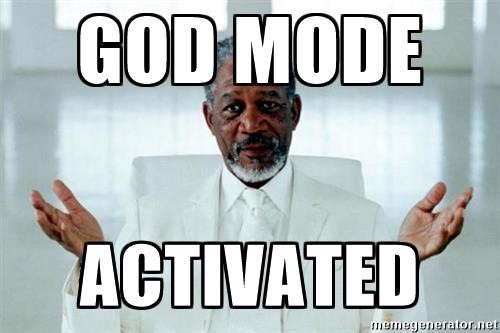

<p style="font-size:0px">⁣          🎈🎈  ☁️<br>
         🎈🎈🎈<br>
 ☁️     🎈🎈🎈🎈<br>
        🎈🎈🎈🎈<br>
   ☁️    ⁣🎈🎈🎈<br>
           \|/<br>
           🏠   ☁️<br>
   ☁️         ☁️<br>
<br>
🌳🌹🏫🌳🏢🏢_🏢🏢🌳🌳<br></p>